## Introduction
In this notebook, we will be training a classification model to predict what South African language a given text is written in. South Africa is a linguistically diverse country with 11 official languages, including Zulu, Xhosa, Afrikaans, English, and more. Being able to automatically identify the language of a given text can have various applications, such as language detection for customer support or content filtering.

In [1]:
# import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

In [2]:
# import our train and test data
train_df = pd.read_csv('data/train_set.csv')
test_df = pd.read_csv('data/test_set.csv')

## EDA and Text Preprocessing
In this section, we will be carrying out exploratory data analysis (EDA) on our training data and performing various cleaning techniques on our text data to ensure its quality and prepare it for further analysis and modeling.

1. Data Exploration:
   - We will start by gaining an understanding of our training data. We will examine the distribution of South African language labels to determine if the dataset is balanced or skewed towards certain languages.
   - We can visualize the distribution using bar plots or pie charts to get a clear overview.
2. Preprocessing:
   - We will be using the sklearn "CountVectorizer" class to encode our text data into a numerical representation based on word counts.

In [3]:
# view our dataset
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


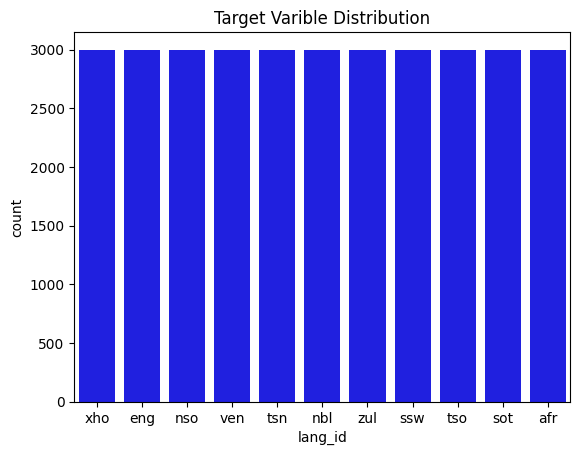

In [4]:
# view the distribution of our target variable "lang_id"
sns.countplot(data=train_df, x='lang_id', color='blue')
plt.title('Target Varible Distribution');

We can see that we have a balanced dataset with about 3000 examples for each of the languages.

In [5]:
# view a info on our dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [6]:
# view description on our dataset
train_df.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


We can see that there are a few duplicate texts in our dataset. We will be droppimg duplicates.

In [7]:
# drop duplicates
train_drop = train_df.drop_duplicates(subset='text')

In [9]:
# view description on our dataset
train_drop.describe()

,lang_id,text
count,29948,29948
unique,11,29948
top,eng,umgaqo-siseko wenza amalungiselelo kumaziko ax...
freq,2998,1


## Process Text Data

In [148]:
# import our vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
# encode using count vectorizer
vect = CountVectorizer(lowercase=True, ngram_range=(1,3), max_features=1500, stop_words='english')
X_count = vect.fit_transform(train_drop['text'])

In [150]:
X_count = X_count.toarray()
X_count.shape

(29948, 1500)

In [151]:
# store our target varible in a variable
y = train_drop['lang_id']
y.shape

(29948,)

## Model Training and Evaluation
In this section, we will be training the following machine learning models on our vectorized features: Logistic Regression, Random Forest Classifier, Support Vector Machine (SVM) and Naive Bayes Classifiers. These models are commonly used for classification tasks and can provide insights into different aspects of our data.

1. Logistic Regression: We will leverage the logistic regression model to predict the class labels based on the vectorized features. Logistic regression is a linear model that works well for binary and multiclass classification. It will provide us with interpretable results and insights into the importance of different features in predicting the class labels.

2. Random Forest Classifier: The random forest classifier is an ensemble model that combines multiple decision trees to make predictions. It is robust against overfitting and can handle high-dimensional feature spaces effectively. By training the random forest classifier on our vectorized features, we can leverage the ensemble of trees to capture complex relationships and improve prediction accuracy.

3. Support Vector Machine (SVM): SVM is a powerful algorithm for classification tasks. It aims to find the optimal hyperplane that maximally separates the classes. By training an SVM on our vectorized features, we can identify the best decision boundary that separates the classes and generalize well to unseen data.

4. Naive Bayes: Naive Bayes is a probabilistic algorithm that assumes independence between features given the class labels. Despite its simplifying assumption, Naive Bayes is efficient and effective in many classification tasks. By training Naive Bayes on our vectorized features, we can leverage its probabilistic nature to estimate the posterior probabilities of class labels and make predictions based on the highest probability. Naive Bayes is particularly popular for text classification and spam detection tasks, but it can also be applied to a wide range of multiclass classification problems.

By comparing the performance of these machine learning models on our vectorized features, we can gain insights into which model works best for our specific classification problem and potentially identify important features for predicting the class labels.

In [182]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from comet_ml import Experiment
import warnings
import logging
warnings.filterwarnings('ignore')
logging.getLogger("comet_ml").setLevel(logging.CRITICAL)

In [153]:
# define a function to handle training and evaluation
def train_evaluate(model, X, y):
    experiment = Experiment(
    api_key = "iqazL08SbQfg0MqWe4Jv1zo3p",
    project_name = "south-african-language-identification-hack-2023",
    workspace="manlikesolomon")

    # split out predictors and target into test and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

    # fit our model
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1 = f1_score(y_test, pred,average='weighted')
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    accuracy = accuracy_score(y_test, pred)

    print('Accuracy: ', accuracy)
    print('f1_score: ', f1)
    print('Recall: ', recall)
    print('Precision: ', precision)

    metrics = {'Accuracy': accuracy, 'Precision':precision, 'Recall':recall, 'f1':f1}
    params = model.get_params()
    # log parameters
    experiment.log_parameters(params)
    experiment.log_metrics(metrics)
    experiment.log_confusion_matrix(y_true=y_test, y_predicted=pred)
    experiment.end()
    return model, f1, precision, recall, accuracy

### Logistic Regression

In [154]:
# instantiate model object
lr_count = LogisticRegression()
# train and evaluate model
lr_c,f1_lr, precision_lr, recall_lr, accuracy_lr = train_evaluate(lr_count,X_count,y)

Accuracy:  0.9684786964071056
f1_score:  0.9683225134826711
Recall:  0.9684786964071056
Precision:  0.9684470721374074


## Naive Bayes Model

We will train two variations of the Naive Bayes algorithm:

1. GaussianNB: Gaussian Naive Bayes assumes that the features follow a Gaussian (normal) distribution. It is suitable for continuous or numerical features. By estimating the mean and variance of each feature for each class, GaussianNB calculates the likelihood of observing a feature value given the class. It performs well when the feature distribution is approximately Gaussian.

2. MultinomialNB: Multinomial Naive Bayes is designed for discrete or count-based features, typically used for text classification. It assumes that the features are generated from a multinomial distribution. MultinomialNB estimates the probabilities of observing each feature value given the class using frequency-based statistics. It works well with features represented as occurrence counts or term frequencies.

By exploring both GaussianNB and MultinomialNB, we can assess their performance and select the most appropriate variant based on the nature of our features and the specific requirements of our classification problem.

In [183]:
# instantiate model object
nb_ga= GaussianNB()
# train and evaluate model
nb_g,f1_nb, precision_nb, recall_nb, accuracy_nb = train_evaluate(nb_ga,X_count,y)

Accuracy:  0.9467076265526914
f1_score:  0.94488408960042
Recall:  0.9467076265526914
Precision:  0.9506204657139652


In [184]:
# instantiate model object
nb_mu = MultinomialNB()
# train and evaluate model
nb_m,f1_nb_m, precision_nb_m, recall_nb_m, accuracy_nb_m = train_evaluate(nb_mu,X_count,y)

Accuracy:  0.9699479097101643
f1_score:  0.9697497957965405
Recall:  0.9699479097101643
Precision:  0.9697511382891619


## Support Vector Classifier

In [156]:
# instantiate model object
svc_lin = SVC(kernel='linear')
# train and evaluate model
svc_l,f1_svc, precision_svc, recall_svc, accuracy_svc = train_evaluate(svc_lin,X_count,y)

Accuracy:  0.9631361025778015
f1_score:  0.9629087949396348
Recall:  0.9631361025778015
Precision:  0.9632062045498523


In [157]:
# instantiate model object
svc_poly = SVC(kernel='poly')
# train and evaluate model
svc_p,f1_svc_p, precision_svc_p, recall_svc_p, accuracy_svc_p = train_evaluate(svc_poly,X_count,y)

Accuracy:  0.6743689061039134
f1_score:  0.648291137122439
Recall:  0.6743689061039134
Precision:  0.9084194845316963


## Random Forest Classifier

In [158]:
# train using X_count
# instantiate model object
rfc = RandomForestClassifier(n_estimators=300)
rfc_c,f1_rfc, precision_rfc, recall_rfc, accuracy_rfc = train_evaluate(rfc,X_count,y)

Accuracy:  0.9569921196741018
f1_score:  0.9567172074313698
Recall:  0.9569921196741018
Precision:  0.956855870407425


### View Model Performance Metrics
We will compare model performance using the following metrics:

1. Accuracy: Accuracy measures the overall correctness of the model's predictions. It calculates the ratio of correctly predicted instances to the total number of instances in the dataset. A higher accuracy indicates a more accurate model.

2. Recall: Recall, also known as sensitivity or true positive rate, measures the model's ability to find all positive instances. It calculates the ratio of correctly predicted positive instances to the total number of actual positive instances. Higher recall indicates a better ability to capture positive instances.

3. Precision: Precision measures the model's ability to correctly identify positive predictions for each class. It calculates the ratio of correctly predicted positive instances to the total number of predicted positive instances. Higher precision indicates a lower rate of false positives.

4. F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure that considers both precision and recall. The F1 score is useful when there is an uneven class distribution or when false positives and false negatives have different consequences.

In [214]:
# store metrics in a dictionary
model_performance = {
                    'Accuracy':
                    {
                        'Logistic Regression': accuracy_lr,
                        'GaussianNB': accuracy_nb,
                        'MultinomialNB': accuracy_nb_m,
                        'Support Vector Classifier': accuracy_svc,
                        'Random Forest Classifier': accuracy_rfc},
                    'Precision':
                    {
                        'Logistic Regression': precision_lr,
                        'GaussianNB': precision_nb,
                        'MultinomialNB': precision_nb_m,
                        'Support Vector Classifier': precision_svc,
                        'Random Forest Classifier': precision_rfc},
                    'Recall':
                    {
                        'Logistic Regression': recall_lr,
                        'GaussianNB': recall_nb,
                        'MultinomialNB': recall_nb_m,
                        'Support Vector Classifier': recall_svc,
                        'Random Forest Classifier': recall_rfc},
                    'F1 Score':
                    {
                        'Logistic Regression': f1_lr,
                        'GaussianNB': f1_nb,
                        'MultinomialNB': f1_nb_m,
                        'Support Vector Classifier': f1_svc,
                        'Random Forest Classifier': f1_rfc}
}
# create dataframe from dictionary

model_performance = pd.DataFrame(model_performance)
model_performance.sort_values(by='F1 Score',ascending=False)

,Accuracy,Precision,Recall,F1 Score
MultinomialNB,0.969948,0.969751,0.969948,0.969750
Logistic Regression,0.968479,0.968447,0.968479,0.968323
Support Vector Classifier,0.963136,0.963206,0.963136,0.962909
Random Forest Classifier,0.956992,0.956856,0.956992,0.956717
GaussianNB,0.946708,0.950620,0.946708,0.944884


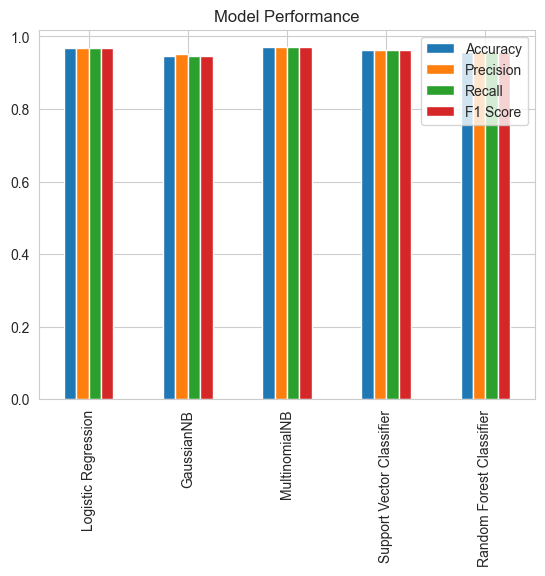

In [222]:
# plot performance metrics
sns.set_style('whitegrid')
model_performance.plot(kind='bar')
plt.title('Model Performance');

## Improving Model Performance

### Using Heterogenous Ensamble Methods
Heterogeneous ensemble methods combine multiple diverse models or algorithms to make predictions. These methods leverage the strengths of different models and aim to improve overall performance
* Voting Classifier: Combines predictions from multiple classification models using voting mechanism for final prediction.
* Stacking Classifier: Combines predictions from multiple classification models by training a meta-classifier on the base models' predictions

### Voting Classifier

In [185]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier
# intantiate model objects
lr_v = LogisticRegression()
rfc_v = RandomForestClassifier(n_estimators=300)
nb_v = MultinomialNB()

In [190]:
# store models we will use from ensembling in a list
models = [('lr',lr_v), ('rfc',rfc_v), ('nb', nb_v)]
model_weights = [0.3,0.3,0.4]
voting_classifier = VotingClassifier(estimators=models, weights=model_weights)

In [191]:
# train using X_count
vc,f1_vc, precision_vc, recall_vc, accuracy_vc = train_evaluate(voting_classifier,X_count,y)

Accuracy:  0.9706157339388273
f1_score:  0.9704160575945601
Recall:  0.9706157339388273
Precision:  0.9705034019625962


### Stacking Classifier

In [201]:
# import stacking classifier
# import a stacking regressor
from sklearn.ensemble import StackingClassifier

# intantiate model objects
nb_s = MultinomialNB()
lr_s = LogisticRegression()
rfc_s = RandomForestClassifier(n_estimators=300)

# store our base models and meta classifier
base_models = [('lr',lr_s), ('rfc',rfc_s), ('nb',nb_s)]
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)

In [202]:
# fit our stacking classifier
sc,f1_sc, precision_sc, recall_sc, accuracy_sc = train_evaluate(stacking_classifier,X_count,y)

Accuracy:  0.9728863363162815
f1_score:  0.9727751646746337
Recall:  0.9728863363162815
Precision:  0.9727977476072217


In [223]:
# store model as a pickle file
# Save the model to a file
with open('models/sc_model.pkl', 'wb') as file:
    pickle.dump(sc, file)

## Make Predictions on Test Data

In [196]:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [197]:
X_sub = vect.transform(test_df['text'])

In [198]:
X_sub = X_sub.toarray()

In [203]:
# make predictions
pred = sc.predict(X_sub)
merged_df = pd.DataFrame({'index':test_df['index'], 'lang_id':pred})

In [205]:
# save predictions as a csv file
merged_df.to_csv('data/predixct_sc5.gz', index=False, compression='gzip')